In [3]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('downloads/cdnow.csv')

In [3]:
df.head()

,Unnamed: 0,customer_id,date,quantity,price
0,0,1,1997-01-01,1,11.77
1,1,2,1997-01-12,1,12.00
2,2,2,1997-01-12,5,77.00
3,3,3,1997-01-02,2,20.76
4,4,3,1997-03-30,2,20.76


In [4]:
df

,Unnamed: 0,customer_id,date,quantity,price
0,0,1,1997-01-01,1,11.77
1,1,2,1997-01-12,1,12.00
2,2,2,1997-01-12,5,77.00
3,3,3,1997-01-02,2,20.76
4,4,3,1997-03-30,2,20.76
...,...,...,...,...,...
69654,69654,23568,1997-04-05,4,83.74
69655,69655,23568,1997-04-22,1,14.99
69656,69656,23569,1997-03-25,2,25.74
69657,69657,23570,1997-03-25,3,51.12


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  69659 non-null  int64  
 1   date         69659 non-null  object 
 2   quantity     69659 non-null  int64  
 3   price        69659 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ MB


In [7]:
df.describe()

,customer_id,quantity,price
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.850581
std,6819.904848,2.333924,35.551864
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,932.230000


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  69659 non-null  int64         
 1   date         69659 non-null  datetime64[ns]
 2   quantity     69659 non-null  int64         
 3   price        69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [10]:
df.head()

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [11]:
first_purchase = df['date'].min()
first_purchase

Timestamp('1997-01-01 00:00:00')

In [12]:
last_purchase = df['date'].max()
last_purchase

Timestamp('1998-06-30 00:00:00')

In [13]:
delta = last_purchase - first_purchase
delta.days

545

Dataset is of 545 days

COHORT 

In [14]:
df['price'].groupby(df['date'].dt.to_period('M')).sum()

date
1997-01    299060.17
1997-02    378590.03
1997-03    392155.27
1997-04    142824.49
1997-05    107933.30
1997-06    108395.87
1997-07    122078.88
1997-08     88367.69
1997-09     81948.80
1997-10     89780.77
1997-11    115448.64
1997-12     95577.35
1998-01     76756.78
1998-02     77096.96
1998-03    108970.15
1998-04     66231.52
1998-05     70989.66
1998-06     75109.30
Freq: M, Name: price, dtype: float64

<Axes: xlabel='date'>

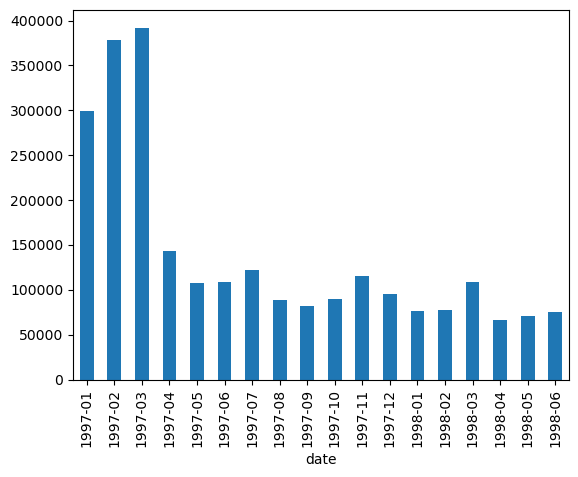

In [15]:
df['price'].groupby(df['date'].dt.to_period('M')).sum().plot(kind='bar')

In [16]:
cohort_df = df
cohort_df['tx_month'] = cohort_df['date'].apply(lambda x: date(x.year, x.month,1))
cohort_df['acq_month'] = cohort_df.groupby('customer_id')['tx_month'].transform('min')
cohort_df.loc[df['tx_month'] != cohort_df['acq_month']].head()


,customer_id,date,quantity,price,tx_month,acq_month
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-01
5,3,1997-04-02,2,19.54,1997-04-01,1997-01-01
6,3,1997-11-15,5,57.45,1997-11-01,1997-01-01
7,3,1997-11-25,4,20.96,1997-11-01,1997-01-01
8,3,1998-05-28,1,16.99,1998-05-01,1997-01-01


In [17]:
def diff_month(x):

    d1 = x['tx_month']

    d2 = x["acq_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1

cohort_df['cohort_idx'] = cohort_df.apply(lambda x: diff_month(x), axis=1)

cohort_df


,customer_id,date,quantity,price,tx_month,acq_month,cohort_idx
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,1
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-01,1
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-01,1
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-01,1
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-01,3
...,...,...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01,1997-03-01,2
69655,23568,1997-04-22,1,14.99,1997-04-01,1997-03-01,2
69656,23569,1997-03-25,2,25.74,1997-03-01,1997-03-01,1
69657,23570,1997-03-25,3,51.12,1997-03-01,1997-03-01,1


In [18]:
# cohort_df = cohort_df.groupby(['acq_month', 'cohort_idx'])['customer_id'].apply(pd.Series.nunique).reset_index()
# cohort_count = cohort_df.pivot_table(index = 'acq_month',
#                                        columns = 'cohort_idx',
#                                        values = 'customer_id')
# cohort_count

In [19]:
# cohort_size = cohort_count.iloc[:,0]
# retention = cohort_count.divide(cohort_size, axis = 0)
# retention.round(3) * 100

In [20]:
# plt.figure(figsize = (11,9))
# plt.title('Cohort Analysis - Retention Rate')
# sns.heatmap(data = retention, 
#             annot = True, 
#             fmt = '.0%', 
#             vmin = 0.0,
#             vmax = 0.5,
#             cmap = "YlGnBu")
# plt.show()

RFM ANALYSIS

In [21]:
df.head()

,customer_id,date,quantity,price,tx_month,acq_month,cohort_idx
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,1
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-01,1
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-01,1
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-01,1
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-01,3


In [22]:
df = df.drop(['tx_month','acq_month','cohort_idx'], axis=1)

In [23]:
df.head()

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


SETTING THRESHHOLD FOR 6 MONTHS ~ 180 DAYS

In [24]:
thresh_days = 180

In [25]:
cutoff = last_purchase - pd.to_timedelta(thresh_days, unit = "d")
cutoff

Timestamp('1998-01-01 00:00:00')

In [26]:
before_df = df[df['date'] <= cutoff]
after_df = df[df['date'] > cutoff]

In [27]:
target_df = after_df.drop('quantity',axis=1).groupby('customer_id').sum()
target_df = target_df.rename({'price': 'spendtotal_180'}, axis=1).assign(flag=1)
target_df 

C:\Users\AL53348\AppData\Local\Temp\1\ipykernel_25912\1650628008.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target_df = after_df.drop('quantity',axis=1).groupby('customer_id').sum()


,spendtotal_180,flag
customer_id,,
3,16.99,1
5,37.47,1
7,138.50,1
8,24.46,1
9,41.98,1
...,...,...
23554,24.60,1
23555,77.44,1
23556,57.96,1


RECENCY

In [28]:
recency = before_df[['customer_id', 'date']].groupby('customer_id')
recency = recency.apply(lambda x: (x['date'].max() - cutoff) / pd.to_timedelta(1,"day"))
recency = recency.to_frame().set_axis(["recency"],axis=1)
recency

,recency
customer_id,
1,-365.0
2,-354.0
3,-37.0
4,-20.0
5,-20.0
...,...
23566,-282.0
23567,-282.0
23568,-254.0


FREQUENCY

In [29]:
frequency = before_df[['customer_id','date']].groupby('customer_id').count().set_axis(['frequency'],axis=1)
frequency

,frequency
customer_id,
1,1
2,2
3,5
4,4
5,10
...,...
23566,1
23567,1
23568,3


MONETARY

In [30]:
price = before_df.groupby('customer_id').aggregate({'price': ["sum", "mean"]})
price = price.set_axis(['price_sum', 'price_mean'], axis=1)
price

,price_sum,price_mean
customer_id,,
1,11.77,11.770000
2,89.00,44.500000
3,139.47,27.894000
4,100.50,25.125000
5,348.14,34.814000
...,...,...
23566,36.00,36.000000
23567,20.97,20.970000
23568,121.70,40.566667


In [31]:
final_df = pd.concat([recency, frequency, price], axis=1).merge(target_df,
                                                                left_index=True,
                                                                right_index=True,
                                                                how="left").fillna(0)

In [32]:
final_df.head()

,recency,frequency,price_sum,price_mean,spendtotal_180,flag
customer_id,,,,,,
1,-365.0,1,11.77,11.770,0.00,0.0
2,-354.0,2,89.00,44.500,0.00,0.0
3,-37.0,5,139.47,27.894,16.99,1.0
4,-20.0,4,100.50,25.125,0.00,0.0
5,-20.0,10,348.14,34.814,37.47,1.0


CLASSIFICATION AND PREDICTION

In [33]:
X = final_df[['recency','frequency','price_sum','price_mean']]
y_pred = final_df['spendtotal_180']

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

rfc.fit(X,y_pred)
y_pred = rfc.predict(X)
y_pred

array([ 0.        ,  0.        , 16.9799    , ...,  3.6721    ,
        3.60013333,  3.9266    ])

In [35]:
y_class = final_df['flag']

In [36]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

rfc.fit(X,y_class)
y_class = rfc.predict(X)
y_class

array([0.        , 0.        , 0.73      , ..., 0.02      , 0.15333333,
       0.08      ])

In [37]:
final_df['pred_180_days'] = y_pred
final_df['probabilities'] = y_class
final_df.head()

,recency,frequency,price_sum,price_mean,spendtotal_180,flag,pred_180_days,probabilities
customer_id,,,,,,,,
1,-365.0,1,11.77,11.770,0.00,0.0,0.0000,0.00
2,-354.0,2,89.00,44.500,0.00,0.0,0.0000,0.00
3,-37.0,5,139.47,27.894,16.99,1.0,16.9799,0.73
4,-20.0,4,100.50,25.125,0.00,0.0,12.6960,0.22
5,-20.0,10,348.14,34.814,37.47,1.0,57.0588,1.00


In [38]:
final_df

,recency,frequency,price_sum,price_mean,spendtotal_180,flag,pred_180_days,probabilities
customer_id,,,,,,,,
1,-365.0,1,11.77,11.770000,0.00,0.0,0.000000,0.000000
2,-354.0,2,89.00,44.500000,0.00,0.0,0.000000,0.000000
3,-37.0,5,139.47,27.894000,16.99,1.0,16.979900,0.730000
4,-20.0,4,100.50,25.125000,0.00,0.0,12.696000,0.220000
5,-20.0,10,348.14,34.814000,37.47,1.0,57.058800,1.000000
...,...,...,...,...,...,...,...,...
23566,-282.0,1,36.00,36.000000,0.00,0.0,0.000000,0.000000
23567,-282.0,1,20.97,20.970000,0.00,0.0,2.946300,0.070000
23568,-254.0,3,121.70,40.566667,0.00,0.0,3.672100,0.020000


In [4]:
import pickle

open('pred.pkl', 'rb') 


<_io.BufferedReader name='pred.pkl'>